# Compare Sports Team Win/Loss Records Over Time
<img src="sportslogo.jpg" align='left' width="300" length="230" />

<img src="NBA Western Winner 2000s.JPG" align='left' width="700" length="700" />

In [2]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML
from collections import defaultdict
import matplotlib.colors as mc
import re
%matplotlib inline


In [3]:
#import the file into Python 
records=pd.read_excel('Sports Records by Year.xlsx')

In [4]:
records

,Year,Team,Wins,Losses,Ties,Sport,Conf
0,1960,Air Force Falcons,4.0,6.0,0.0,NCAA Football,NCAAF Indep
1,1961,Air Force Falcons,3.0,7.0,0.0,NCAA Football,NCAAF Indep
2,1962,Air Force Falcons,5.0,5.0,0.0,NCAA Football,NCAAF Indep
3,1963,Air Force Falcons,7.0,4.0,0.0,NCAA Football,NCAAF Indep
4,1964,Air Force Falcons,4.0,5.0,1.0,NCAA Football,NCAAF Indep
...,...,...,...,...,...,...,...
10519,2015,Wyoming Cowboys,2.0,10.0,0.0,NCAA Football,NCAAF MWC
10520,2016,Wyoming Cowboys,8.0,6.0,0.0,NCAA Football,NCAAF MWC
10521,2017,Wyoming Cowboys,8.0,5.0,0.0,NCAA Football,NCAAF MWC
10522,2018,Wyoming Cowboys,6.0,6.0,0.0,NCAA Football,NCAAF MWC


In [5]:
records.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10524 entries, 0 to 10523
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Year    10524 non-null  int64  
 1   Team    10524 non-null  object 
 2   Wins    10522 non-null  float64
 3   Losses  10522 non-null  float64
 4   Ties    7458 non-null   float64
 5   Sport   10524 non-null  object 
 6   Conf    10524 non-null  object 
dtypes: float64(3), int64(1), object(3)
memory usage: 575.7+ KB


In [6]:
records= records.astype({'Wins': 'Int32', 'Losses': 'Int32', 'Ties': 'Int32' })

In [7]:
#assigning a related bar color for each team
colorarray={'Arizona Cardinals': '#97233F','Atlanta Falcons':'Black','Baltimore Colts': '#002C5F','Baltimore Ravens':'Rebeccapurple','Boston Patriots':'#002244','Buffalo Bills':'Royalblue','Carolina Panthers':'#0085CA','Cincinnati Bengals':'#fb4f14','Chicago Bears':'#0B162A','Cleveland Browns':'Sienna','Dallas Cowboys':'Silver','Denver Broncos':'#002244','Detroit Lions':'#B0B7BC','Green Bay Packers': '#203731','Houston Oilers':'lightblue','Houston Texans':'#A71930','Indianapolis Colts':'#002C5F','Jacksonville Jaguars':'#006778','Kansas City Chiefs':'#E31837','Los Angeles Chargers':'#0080C6','Los Angeles Raiders':'#000000','Los Angeles Rams':'#866D4B','Miami Dolphins':'#008E97','Minnesota Vikings': '#4F2683','New England Patriots':'#002244','New Orleans Saints':'#D3BC8D','New York Giants':'#0B2265','New York Jets':'#125740','Oakland Raiders':'#000000', 'Philadelphia Eagles':'#004C54','Phoenix Cardinals':'#97233F','Pittsburgh Steelers':'#FFB612','San Diego Chargers':'#0080C6','San Francisco 49ers':'#AA0000','Seattle Seahawks': '#69BE28','St. Louis Rams': '#866D4B','Tampa Bay Buccaneers':'orangered','Tennessee Oilers':'lightblue','Tennessee Titans':'#4B92DB','Washington Redskins':'#773141','Atlanta Hawks': '#E03A3E','Baltimore Bullets': 'orange','Boston Celtics': '#007A33','Brooklyn Nets': '#000000','Buffalo Braves': 'orange','Charlotte Bobcats': 'lightblue','Charlotte Hornets': '#00788C','Chicago Bulls': '#CE1141','Cincinnati Royals': 'royalblue','Cleveland Cavaliers': '#FDBB30','Dallas Mavericks': '#00538C','Denver Nuggets': '#0E2240','Detroit Pistons': '#1D42BA','Golden State Warriors': '#FFC72C','Houston Rockets': '#CE1141','Indiana Pacers': '#FDBB30','Kansas City Kings':'blue','Los Angeles Clippers': '#1D428A','Los Angeles Lakers': '#552583','Memphis Grizzlies': '#5D76A9','Miami Heat': '#000000','Milwaukee Bucks': '#00471B','Minneapolis Lakers': '#FFC72C','Minnesota Timberwolves': '#78BE20','New Jersey Nets': '#C8102E','New Orleans Hornets': '#00788C','New Orleans Pelicans': '#0C2340','New Orleans Jazz': '#1D1160','New York Knicks': '#006BB6','Oklahoma City Thunder': '#EF3B24','Orlando Magic': '#0077C0','Philadelphia 76ers': '#006BB6','Phoenix Suns': '#1D1160','Portland Trail Blazers': '#000000','Sacramento Kings': '#5A2D81','San Antonio Spurs': '#C4CED4','San Diego Rockets':'Green','San Francisco Warriors': '#FFC72C','Seattle SuperSonics': '#00653A','Toronto Raptors': '#CE1141','Utah Jazz': '#002B5C','Vancouver Grizzlies': '#00788C','Washington Bullets': '#E31837','Washington Wizards': '#E31837','Arizona Diamondbacks': '#A71930','Atlanta Braves': '#13274F','Baltimore Orioles': '#DF4601','Boston Red Sox': '#BD3039','Boston Red Sox': '#BD3039','California Angels':'#BA0021','Chicago Cubs': '#0E3386','Chicago White Sox': '#27251F','Cincinnati Reds': '#C6011F','Cleveland Indians': '#E31937','Colorado Rockies': '#33006F','Detroit Tigers': '#0C2340','Detroit Tigers': '#0C2340','Houston Astros': '#EB6E1F','Florida Marlins':'Teal','Kansas City Royals': '#004687','Los Angeles Angels': '#BA0021','Los Angeles Dodgers': '#005A9C','Miami Marlins': '#00A3E0','Milwaukee Brewers': '#0A2351','Minnesota Twins': '#002B5C','Montreal Expos': '#003087','New York Mets': '#002D72','New York Yankees': '#0C2340','Oakland Athletics': '#003831','Philadelphia Phillies': '#E81828','Pittsburgh Pirates': '#FDB827','St. Louis Cardinals': '#C41E3A','San Diego Padres': '#2F241D','San Francisco Giants': '#FD5A1E','Seattle Mariners': '#005C5C','Tampa Bay Rays': '#8FBCE6','Texas Rangers': '#003278','Toronto Blue Jays': '#134A8E','Washington Nationals': '#AB0003','Air Force Falcons': '#003087','Alabama Crimson Tide': '#9E1B32','Arizona State Sun Devils': '#8C1D40','Arizona Wildcats': '#CC0033','Arkansas Razorbacks': '#9D2235','Army Black Knights': '#97233F','Auburn Tigers': '#0C2340','Baylor Bears': '#003015','Boise State Broncos': '#0033A0','Boston College Eagles': '#98002E','B Y U Cougars': '#002E5D','California Golden Bears': '#FDB515','Central Florida Knights': '#BA9B37','Cincinnati Bearkats': '#E00122','Clemson Tigers': '#F56600','Colorado Buffaloes': '#000000','Colorado State Rams': '#1E4D2B','Connecticut Huskies': '#002E5D','Duke Blue Devils': '#003087','East Carolina Pirates': '#592A8A','Florida Gators': '#0021A5','Florida State Seminoles': '#782F40','Fresno State Bulldogs': '#DB0032','Georgia Bulldogs': '#BA0C2F','Georgia Tech Yellow Jackets': '#B3A369','Hawaii Rainbow Warriors': '#024731','Houston Cougars': '#C8102E','Illinois Fighing Illini': '#E84A27','Indiana Hoosiers': '#990000','Iowa Hawkeyes': '#FFCD00','Iowa State Cyclones': '#C8102E','Kansas Jayhawks': '#0051BA','Kansas State Wildcats': '#512888','Kentucky Wildcats': '#0033A0','Louisville Cardinals': '#AD0000','LSU Tigers': '#461D7C','Maryland Terrapins': '#E03A3E','Memphis Tigers': '#003087','Miami Hurricanes': '#F47321','Michigan State Spartans': '#18453B','Michigan Wolverines': '#FFCB05','Minnesota Golden Gophers': '#7A0019','Mississippi State Bulldogs': '#660000','Missouri Tigers': '#F1B82D','Navy Midshipmen': '#00205B','NC State Wolfpack': '#CC0000','Nebraska Cornhuskers': '#E41C38','Nevada Wolf Pack': '#003366','New Mexico Lobos': '#BA0C2F','New Mexico State Aggies': '#861F41','North Carolina Tarheels': '#7BAFD4','Northwestern Wildcats': '#4E2A84','Notre Dame Fighting Irish': '#0C2340','Ohio State Buckeyes': '#BB0000','Oklahoma Sooners': '#841617','Oklahoma State Cowboys': '#FF7300','Ole Miss Rebels': '#CE1126','Oregon Ducks': '#154733','Oregon State Beavers': '#DC4405','Penn State Nittany Lions': '#041E42','Pittsburgh Panthers': '#FFB81C','Purdue Boilermakers': '#CEB888','Rutgers Scarlet Knights': '#CC0033','San Diego State Aztecs': '#000000','San Jose State Spartans': '#0055A2','SMU Mustangs': '#0033A0','South Carolina Gamecocks': '#73000A','South Florida Bulls': '#006747','Stanford Cardinal': '#8C1515','Syracuse Orange': '#D44500','TCU Horned Frogs': '#4D1979','Temple Owls': '#9D2235','Tennessee Volunteers': '#FF8200','Texas A&M Aggies': '#500000','Texas Longhorns': '#BF5700','Texas Tech Red Raiders': '#CC0000','Tulane Green Wave': '#006747','Tulsa Golden Hurricane': '#002D72','UCLA Bruins': '#2D68C4','UNLV Rebels': '#CF0A2C','USC Trojans': '#990000','Utah State Aggies': '#0F2439','Utah Utes': '#CC0000','Vanderbilt Commodores': '#866D4B','Virginia Cavaliers': '#F84C1E','Virginia Tech Hokies': '#630031','Wake Forest Demon Deacons': '#9E7E38','Washington Huskies': '#4B2E83','Washington State Cougars': '#981E32','West Virginia Mountaineers': '#EAAA00','Wisconsin Badgers': '#C5050C','Wyoming Cowboys': '#492F24'}

In [8]:
#assigning a default color for any team not in the main color assignment dictionary
#colorarray = defaultdict(lambda: 'lightblue', colorarray)

In [9]:
#Create figure and call the draw_barchart function

#Commenting out initial variables unless testing without widget selectors in next cell

#fig, ax = plt.subplots(figsize=(40, 20))
#yearstart=2017
#yearshow=2017
#yearstop=2018
#conf='NBA Eastern'

#useconf=False

#team_list=['Green Bay Packers','Minnesota Vikings','Detroit Lions','Chicago Bears','Seattle Seahawks','Arizona Cardinals','Buffalo Bills','Cincinnati Bengals']
#team_list=['Green Bay Packers']

#creating a function to produce the chart for a specified year

def draw_barchart(yearshow):
    
    
    if((useconf==True) & ((conf!='All NFL') & (conf!='All NBA')  & (conf!='All MLB'))):
        records_selected=records[(records['Year']>=yearstart) & (records['Conf'] == conf)]
    elif((useconf==True) & (conf=='All NFL')):
        records_selected=records[(records['Year']>=yearstart) & (records['Sport'] == 'Football')]
    elif((useconf==True) & (conf=='All NBA')):
        records_selected=records[(records['Year']>=yearstart) & (records['Sport'] == 'Basketball')]
    elif((useconf==True) & (conf=='All MLB')):
        records_selected=records[(records['Year']>=yearstart) & (records['Sport'] == 'Baseball')]
    else:
        records_selected=records[(records['Year']>=yearstart) & (records['Team'].isin(team_list))]
    #print(records_selected)
    records_selected.index = range(len(records_selected))
    runningsum=records_selected.groupby(['Team','Year']).sum().groupby(['Team']).transform('cumsum').reset_index()
    runningsum = runningsum.rename(columns={'Wins': 'TotalWins', 'Losses': 'TotalLosses', 'Ties': 'TotalTies'})
    runningsum=runningsum.drop(['Team','Year'],axis=1)
    records_selected=records_selected.join(runningsum)

    
    records_currentyear=records_selected[records_selected['Year'].eq(yearshow)].sort_values(by=['TotalWins'], ascending=False)

    #show leading bars top to bottom
    records_currentyear = records_currentyear[::-1]
    ax.clear()
                       
    ax.barh(records_currentyear['Team'], records_currentyear['TotalWins'], color = [colorarray[i] for i in records_currentyear['Team']])

    #loop to put text of team after bar and win loss record/season record inside bar
    for i, (totalwins,Team,totallosses, totalties,win,loss,tie,sport) in enumerate(zip(records_currentyear['TotalWins'], records_currentyear['Team'], records_currentyear['TotalLosses'], records_currentyear['TotalTies'], records_currentyear['Wins'],records_currentyear['Losses'],records_currentyear['Ties'],records_currentyear['Sport'])):
        if(sport=='Football' or sport=='NCAA Football'): 
             if(len(records_currentyear['Team'])<9):

                 ax.text(totalwins, i,   str(totalwins) + ' - ' + str(totallosses) + ' - ' + str(totalties), ha='right', color = 'white', weight=600, size = 50, va='center')
                 ax.text(totalwins, i,   '(' + str(yearshow) +': '+ str(win) + ' - ' + str(loss) + ' - ' + str(tie) + ')', ha='left', color = 'red', size = 33, va='top')   
                 ax.text(totalwins, i,   Team, ha='left', color = 'black', size = 33, weight=600, va='bottom')
             elif(9<=len(records_currentyear['Team'])<18):

                 ax.text(totalwins, i,   str(totalwins) + ' - ' + str(totallosses) + ' - ' + str(totalties), ha='right', color = 'white', weight=600, size = 40, va='center')
                 ax.text(totalwins, i,   '(' + str(yearshow) +': '+ str(win) + ' - ' + str(loss) + ' - ' + str(tie) + ')', ha='left', color = 'red', size = 31, va='top')   
                 ax.text(totalwins, i,   Team, ha='left', color = 'black', size = 31, weight=600, va='bottom')
             else:
                 ax.text(totalwins, i,   str(totalwins) + ' - ' + str(totallosses) + ' - ' + str(totalties), ha='right', color = 'white', weight=600, size = 35, va='center')
                 ax.text(totalwins, i,   '(' + str(yearshow) +': '+ str(win) + ' - ' + str(loss) + ' - ' + str(tie) + ')', ha='left', color = 'red', size = 26, va='top')    
                 ax.text(totalwins, i,   Team, ha='left', color = 'black', size = 28, weight=600, va='bottom')
        else:
            if(len(records_currentyear['Team'])<9):
                    
                 
                 ax.text(totalwins, i,   str(totalwins) + ' - ' + str(totallosses), ha='right', color = 'white', weight=600, size = 50, va='center')
                 ax.text(totalwins, i,   '(' + str(yearshow) +': '+ str(win) + ' - ' + str(loss) + ')', ha='left', color = 'red', size = 33, va='top')   
                 ax.text(totalwins, i,   Team, ha='left', color = 'black', size = 33, weight=600, va='bottom')
            elif(9<=len(records_currentyear['Team'])<18):
                 
                 ax.text(totalwins, i,   str(totalwins) + ' - ' + str(totallosses), ha='right', color = 'white', weight=600, size = 40, va='center')
                 ax.text(totalwins, i,   '(' + str(yearshow) +': '+ str(win) + ' - ' + str(loss) + ')', ha='left', color = 'red', size = 31, va='top')  
                 ax.text(totalwins, i,   Team, ha='left', color = 'black', size = 31, weight=600, va='bottom')
            
            else:
                 
                 ax.text(totalwins, i,   str(totalwins) + ' - ' + str(totallosses), ha='right', color = 'white', weight=600, size = 30, va='center')
                 ax.text(totalwins, i,   '(' + str(yearshow) +': '+ str(win) + ' - ' + str(loss) + ')', ha='left', color = 'red', size = 23, va='top')  
                 ax.text(totalwins, i,   Team, ha='left', color = 'black', size = 28, weight=600, va='bottom')
            
    #Putting a bigger year label on the right of graph to make it more obvious what year the data is showing
    ax.text(1.1, 0.3, yearshow, transform=ax.transAxes, size=80, weight=600, ha='right', color='Red')
    
    ax.xaxis.set_ticks_position('top')
    
    plt.tick_params(labelsize = 28)
    if(yearshow==yearstop):
        if (records_currentyear['TotalWins'].iloc[-1] != records_currentyear['TotalWins'].iloc[-2]): 
            ax.set_title(str(yearstart) + ' - ' + str(yearstop) + ' ' + 'WINNER' + ' : ' +  records_currentyear['Team'].iloc[-1].upper(),color = 'Red',size = 55, weight=600)
        else: ax.set_title('TIE:' + ' ' +  records_currentyear['Team'].iloc[-1].upper() + ' AND ' + records_currentyear['Team'].iloc[-2].upper(),color = 'Red',size = 35, weight=600)
    else:
        ax.set_title('Total Wins and Losses ' + ' ' + str(yearstart) + ' - ' + str(yearstop) + '   ' +'('+ str(yearshow) + ')', size = 50, weight=600)    
    
    ax.set_yticklabels([])
    plt.box(False)
    ax.grid(which='major', axis='x', linestyle='-')
    ax.text(0, 1.06, 'Total Wins Since ' +  str(yearstart) +  ' (Reg Season)', transform=ax.transAxes, size=26, color='red')
         
#draw_barchart(yearstart)   

HTML(value='<h4><center><b><u>Submit Input Values to Generate Team Win/Loss Records Over Time</u></b></center>…

HTML(value="<b><u>Choose desired teams to compare in NFL, NFL, MLB, or NCAA Football (only select values in on…

HTML(value="<b><u>Select animation speed to control how fast the year frames advance in the animation.</u></b>…

HTML(value="<b><u>Click 'Run Chart' button to display result!</u></b><ul><li>Animation will play in the <b>nex…

Button(description='Run Chart', icon='check', layout=Layout(margin='20px'), style=ButtonStyle(), tooltip='Clic…

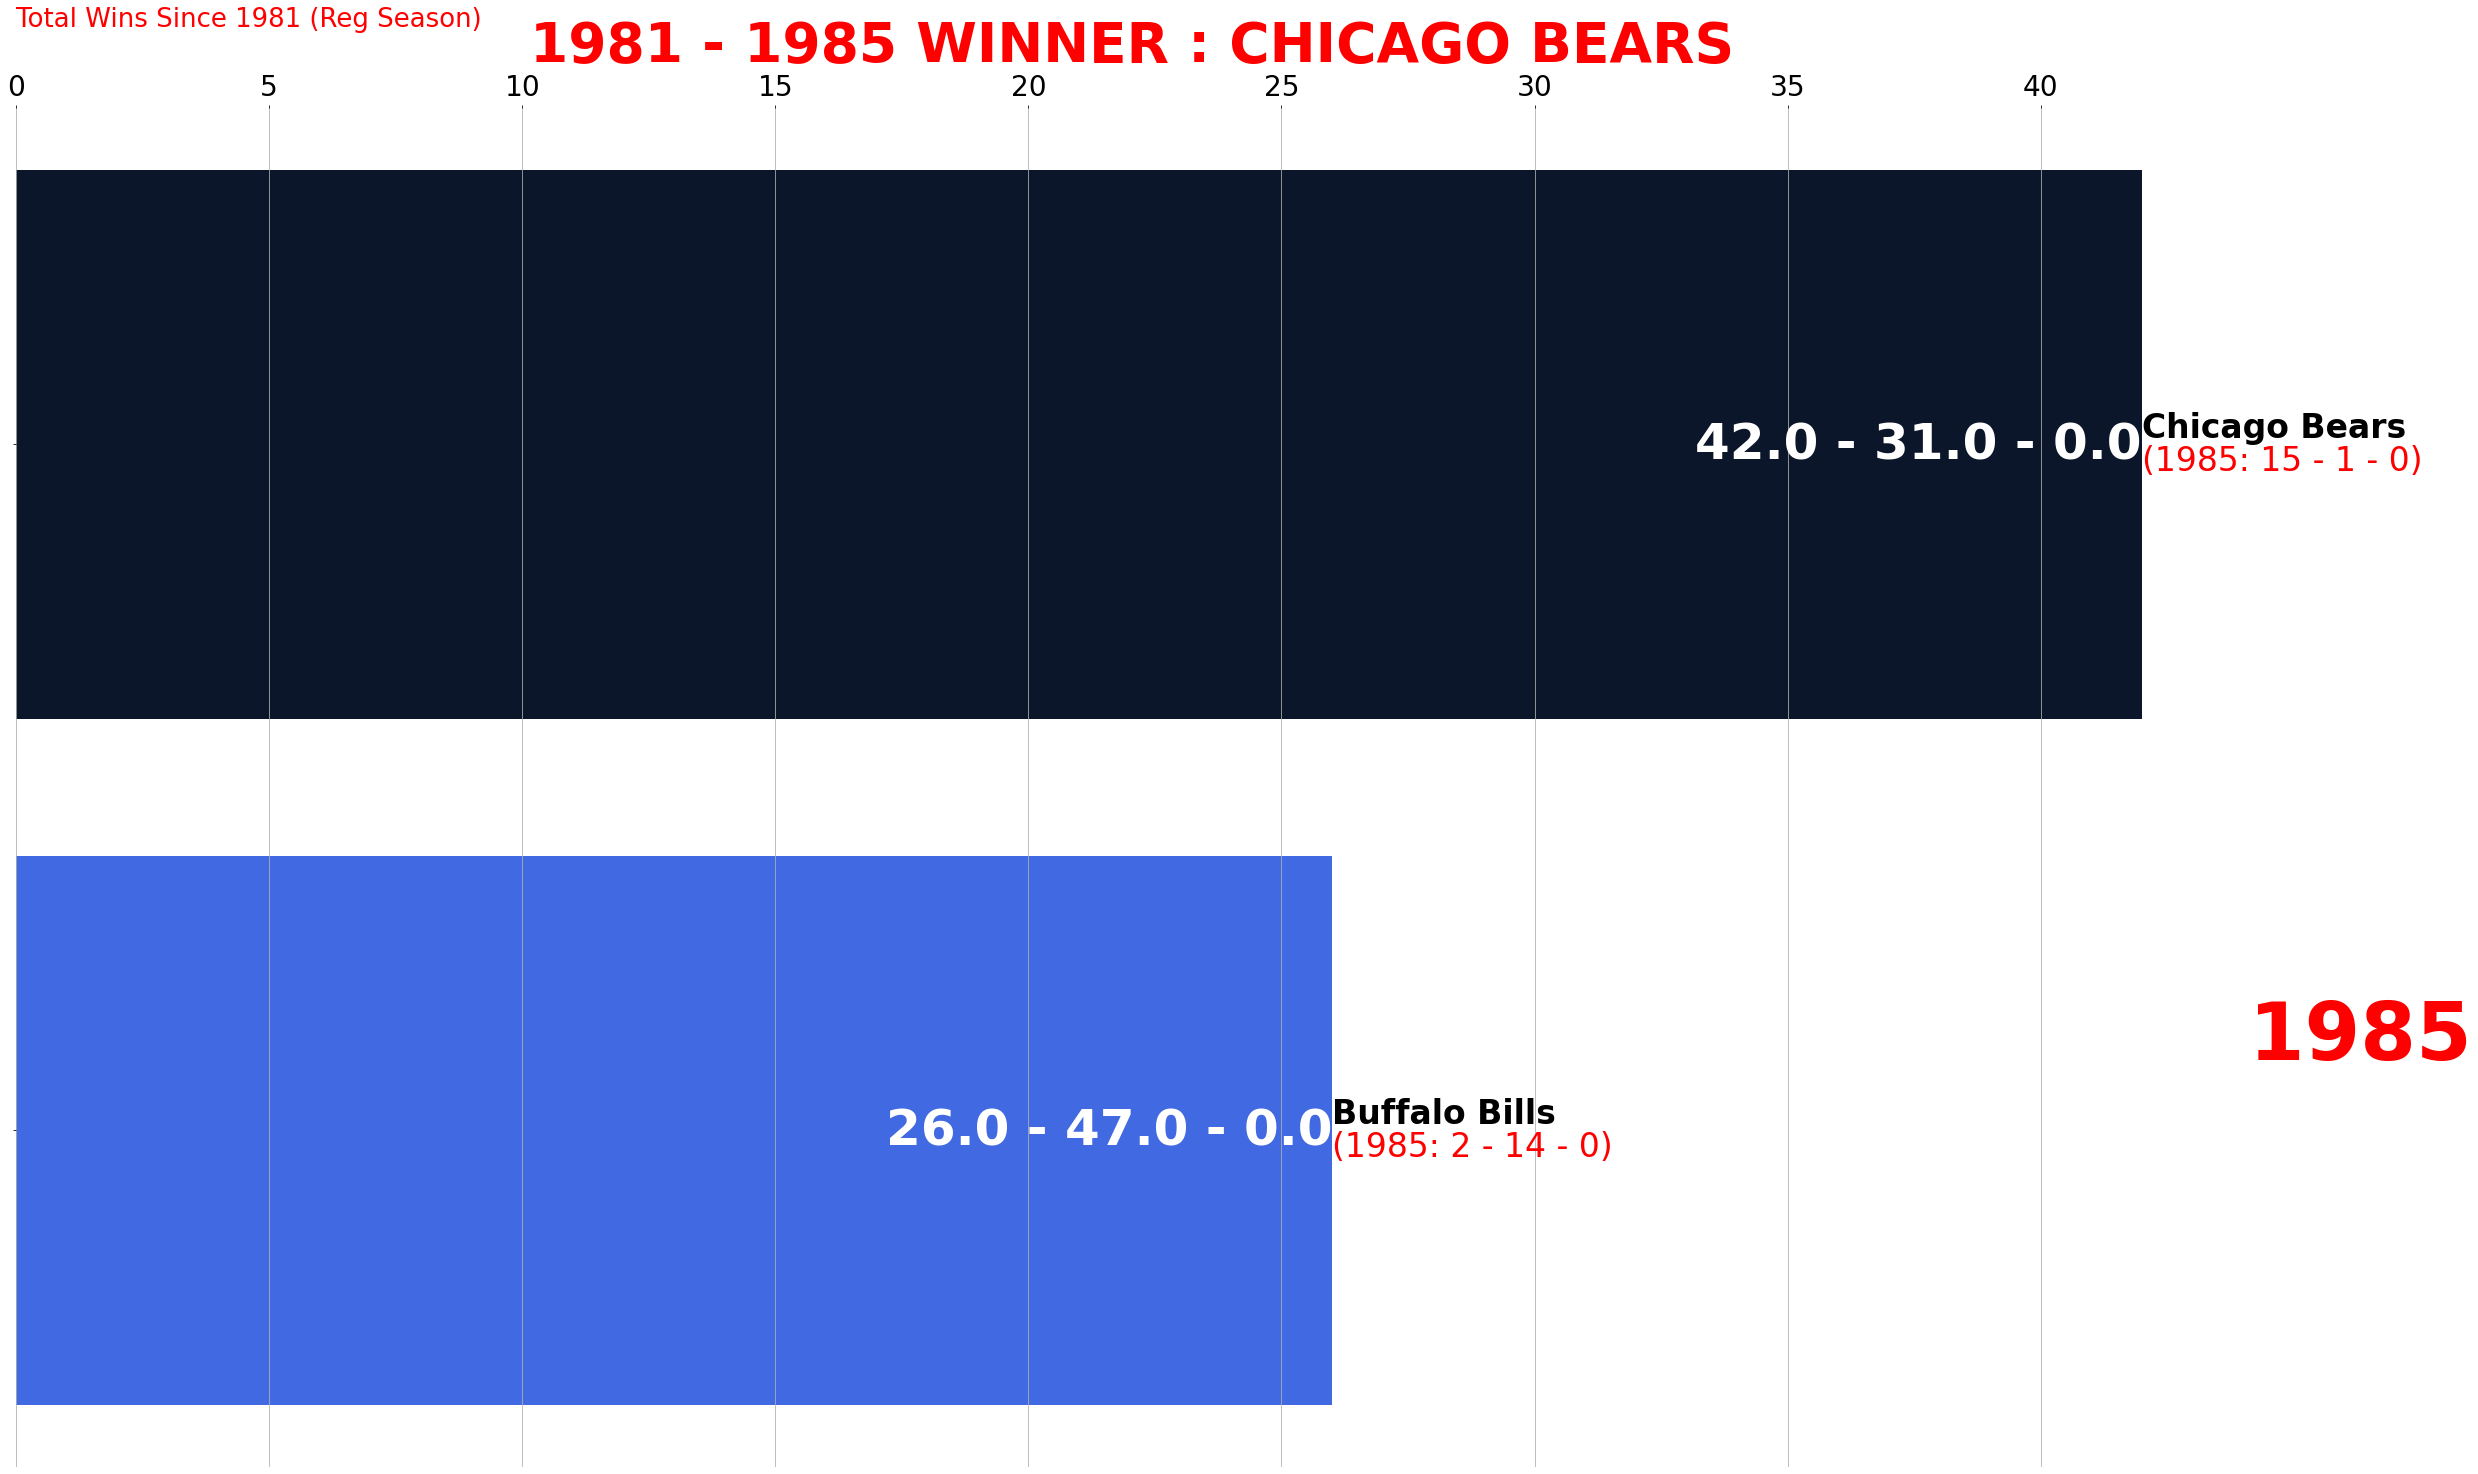

In [11]:
#use ipywidgets to select and submit info
import ipywidgets as wg
from ipywidgets import Text, HBox, VBox, Box, Layout
from IPython.display import Javascript, display

#Set initial variables
#Signals when conference is selected rather than individual teams
useconf=False

#animation speed variables
slow=5000
medium=3000
fast=1500
reallyfast=800

#default to medium
speed=medium

#Default to no conferene/leagues being selected
conf='None'  

team_list=[]


#Display title and instructions on selecting date range
instructions=wg.HTML(
    value="<h4><center><b><u>Submit Input Values to Generate Team Win/Loss Records Over Time</u></b></center></h4><b><u>Select date range for results</u></b><br><ul><li>Select <b>Start Year</b> for the year data is to start. Select <b>End Year</b> for the year data is to end</li></ul>",
    placeholder='',
    description='',
)

display(instructions)

#Start date widget dropdown from 1970 to last year (Initial 'Choose' forces user to select date)
startdateselect=wg.Dropdown(
    options=['Choose',1960, 1961, 1962,1963,1964,1965,1966,1967,1968,1969,1970, 1971, 1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019],
    #value='',
    description='Start Year:',
    disabled=False,
)

#function to set year start variable
def createyearstart(y):
    global yearstart
    yearstart=y

#pass dropdown value to set variable    

wg.interactive(createyearstart,y=startdateselect)

#End date widget dropdown from 1970 to last year
enddateselect=wg.Dropdown(
    options=['Choose',1960, 1961, 1962,1963,1964,1965,1966,1967,1968,1969,1970, 1971, 1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019],
    #value='',
    description='End Year:',
    disabled=False,
)

#function to set year start variable
def createyearstop(z):
    global yearstop
    yearstop=z

#pass dropdown value to set variable        
wg.interactive(createyearstop,z=enddateselect)

#Align date dropdown boxes in horizontal row
display(HBox([startdateselect, enddateselect]))

#Display instructions on selecting teams/conferences
instructions2=wg.HTML(
    value="<b><u>Choose desired teams to compare in NFL, NFL, MLB, or NCAA Football (only select values in one sport)</u></b><br><ul><li>For comparing specific individual teams, select at least 2 teams (hold down Control to select/deselect)</li><li>To run for a conference (or league) instead of specific individual teams, select a single value in the League/conf list</li><li><b>Note: </b>The 'League/conf' list overrides selected values in the team lists. To run for individual teams, ensure 'None' is selected in 'League/conf' list</li></ul>",
    placeholder='',
    description='',
)

display(instructions2)


#create select multiple dropdown for NFL team list
football=wg.SelectMultiple(
    options=['Arizona Cardinals',
 'Atlanta Falcons',
 'Baltimore Colts',
 'Baltimore Ravens',
 'Boston Patriots',
 'Buffalo Bills',
 'Carolina Panthers',
 'Chicago Bears',
 'Cincinnati Bengals',
 'Cleveland Browns',
 'Dallas Cowboys',
 'Detroit Lions',
 'Green Bay Packers',
 'Houston Oilers',
 'Houston Texans',
 'Indianapolis Colts',
 'Jacksonville Jaguars',
 'Kansas City Chiefs',
 'Los Angeles Chargers',
 'Los Angeles Raiders',
 'Los Angeles Rams',
 'Miami Dolphins',
 'Minnesota Vikings',
 'New England Patriots',
 'New Orleans Saints',
 'New York Giants',
 'New York Jets',
 'Oakland Raiders',
 'Philadelphia Eagles',
 'Phoenix Cardinals',
 'Pittsburgh Steelers',
 'San Diego Chargers',
 'San Francisco 49ers',
 'Seattle Seahawks',
 'St. Louis Cardinals',
 'St. Louis Rams',
 'Tampa Bay Buccaneers',
 'Tennessee Oilers',
 'Tennessee Titans',
 'Washington Redskins'],
    value=[],
    #rows=10,
    description='NFL',
    disabled=False,
    layout=Layout(width='350px',height='100px')
)

#function to create team_list variable
def createteamlist(a):
    global team_list
    team_list=a
    
#pass dropdown value to set variable
wg.interactive(createteamlist,a=football)

#create select multiple dropdown for NBA team list
basket=wg.SelectMultiple(
    options=['Atlanta Hawks',
 'Boston Celtics',
 'Brooklyn Nets',
 'Charlotte Bobcats',
 'Charlotte Hornets',
 'Chicago Bulls',
 'Cleveland Cavaliers',
 'Dallas Mavericks',
 'Denver Nuggets',
 'Detroit Pistons',
 'Golden State Warriors',
 'Houston Rockets',
 'Indiana Pacers',
 'Los Angeles Clippers',
 'Los Angeles Lakers',
 'Memphis Grizzlies',
 'Miami Heat',
 'Milwaukee Bucks',
 'Minnesota Timberwolves',
 'New Jersey Nets',
 'New Orleans Hornets',
 'New Orleans Jazz',
 'New Orleans Pelicans',
 'New Orleans/Oklahoma City Hornets',
 'New York Knicks',
 'New York Nets',
 'Oklahoma City Thunder',
 'Orlando Magic',
 'Philadelphia 76ers',
 'Phoenix Suns',
 'Portland Trail Blazers',
 'Sacramento Kings',
 'San Antonio Spurs',
 'Seattle SuperSonics',
 'Toronto Raptors',
 'Utah Jazz',
 'Vancouver Grizzlies',
 'Washington Bullets',
 'Washington Wizards'],
    value=[],
    #rows=10,
    description='NBA',
    disabled=False,
    layout=Layout(width='350px',height='100px')
)


#pass dropdown value to set variable    
wg.interactive(createteamlist,a=basket)


base=wg.SelectMultiple(
    options=['Anaheim Angels',
 'Arizona Diamondbacks',
 'Atlanta Braves',
 'Baltimore Orioles',
 'Boston Red Sox',
 'California Angels',
 'Chicago Cubs',
 'Chicago White Sox',
 'Cincinnati Reds',
 'Cleveland Indians',
 'Colorado Rockies',
 'Detroit Tigers',
 'Florida Marlins',
 'Houston Astros',
 'Kansas City Royals',
 'Los Angeles Angels',
 'Los Angeles Dodgers',
 'Miami Marlins',
 'Milwaukee Brewers',
 'Minnesota Twins',
 'Montreal Expos',
 'New York Mets',
 'New York Yankees',
 'Oakland Athletics',
 'Philadelphia Phillies',
 'Pittsburgh Pirates',
 'San Diego Padres',
 'San Francisco Giants',
 'Seattle Mariners',
 'St. Louis Cardinals',
 'Tampa Bay Rays',
 'Texas Rangers',
 'Toronto Blue Jays',
 'Washington Nationals',
 'Washington Senators'],
    value=[],
    #rows=10,
    description='MLB',
    disabled=False,
    layout=Layout(width='350px',height='100px')
)

#pass dropdown value to set variable    

wg.interactive(createteamlist,a=base)



conference=wg.Dropdown(
    options=['None','All NFL','NFL NFC','NFL AFC','All NBA','NBA Eastern','NBA Western','All MLB','MLB American','MLB National'],
    value='None',
    description='League/Conf',
    disabled=False,
    layout=Layout(width='220px')
)

def createconferencelist(d):
    global conf
    conf=d
    
#pass dropdown value to set variable    

wg.interactive(createconferencelist,d=conference)


ncaaf=wg.SelectMultiple(
    options=['Air Force Falcons',
'Alabama Crimson Tide',
'Arizona State Sun Devils',
'Arizona Wildcats',
'Arkansas Razorbacks',
'Army Black Knights',
'Auburn Tigers',
'Baylor Bears',
'Boise State Broncos',
'Boston College Eagles',
'B Y U Cougars',
'California Golden Bears',
'Central Florida Knights',
'Cincinnati Bearkats',
'Clemson Tigers',
'Colorado Buffaloes',
'Colorado State Rams',
'Connecticut Huskies',
'Duke Blue Devils',
'East Carolina',
'Florida Gators',
'Florida State Seminoles',
'Fresno State Bulldogs',
'Georgia Bulldogs',
'Georgia Tech Yellow Jackets',
'Hawaii Rainbow Warriors',
'Houston Cougars',
'Illinois Fighing Illini',
'Indiana Hoosiers',
'Iowa Hawkeyes',
'Iowa State Cyclones',
'Kansas Jayhawks',
'Kansas State Wildcats',
'Kentucky Wildcats',
'Louisville Cardinals',
'LSU Tigers',
'Maryland Terrapins',
'Memphis Tigers',
'Miami Hurricanes',
'Michigan State Spartans',
'Michigan Wolverines',
'Minnesota Golden Gophers',
'Mississippi State Bulldogs',
'Missouri Tigers',
'Navy Midshipmen',
'NC State',
'Nebraska Cornhuskers',
'Nevada Wolf Pack',
'New Mexico Lobos',
'New Mexico State Aggies',
'North Carolina Tarheels',
'Northwestern Wildcats',
'Notre Dame Fighting Irish',
'Ohio State Buckeyes',
'Oklahoma Sooners',
'Oklahoma State Cowboys',
'Ole Miss Rebels',
'Oregon Ducks',
'Oregon State Beavers',
'Penn State Nittany Lions',
'Pittsburgh Panthers',
'Purdue Boilermakers',
'Rutgers Scarlet Knights',
'San Diego State Aztecs',
'San Jose State Spartans',
'SMU Mustangs',
'South Carolina Gamecocks',
'South Florida Bulls',
'Stanford Cardinal',
'Syracuse Orange',
'TCU Horned Frogs',
'Temple Owls',
'Tennessee Volunteers',
'Texas A&M Aggies',
'Texas Longhorns',
'Texas Tech Red Raiders',
'Tulane Green Wave',
'Tulsa Golden Hurricane',
'UCLA Bruins',
'UNLV Rebels',
'USC Trojans',
'Utah State Aggies',
'Utah Utes',
'Vanderbilt Commodores',
'Virginia Cavaliers',
'Virginia Tech Hokies',
'Wake Forest Demon Deacons',
'Washington Huskies',
'Washington State Cougars',
'West Virginia Mountaineers',
'Wisconsin Badgers',
'Wyoming Cowboys'],
    value=[],
    #rows=10,
    description='NCAAF',
    disabled=False,
    layout=Layout(width='350px',height='100px')
)

#pass dropdown value to set variable    

wg.interactive(createteamlist,a=ncaaf)

#Display team lists in a horizontal row
#display(HBox([football, basket, base, ncaaf]))
display(HBox([football, basket]))
display(HBox([base, ncaaf]))

display(HBox([conference]))

#Display instructions on selecting speed/animation settings
instructions3=wg.HTML(
    value="<b><u>Select animation speed to control how fast the year frames advance in the animation.</u></b> (To see just the final result chart without seeing the year by year animation, check the 'No animation' box.)",
    placeholder='',
    description='',
)

display(instructions3)


#Radio button selection to select animation speed
speedcheck=wg.RadioButtons(
    options=[('Slow', slow), ('Medium', medium), ('Fast', fast), ('Very Fast',reallyfast)],
    value=medium,
    description='AnimSpeed:',
    disabled=False
)

#function to create speed variable
def selectspeed(d):
    global speed
    speed=d
    
#pass dropdown value to set variable    

wg.interactive(selectspeed,d=speedcheck)


#Checkbox for option not to show animation and just final result
animcheck=wg.Checkbox(
    value=False,
    layout=Layout(height='30px',width='500px'),
    description='No animation (show only final result)',
    disabled=False,
    indent=True
)

#function to create noanimate variable
def animateflag(f):
    global noanimate
    noanimate=f
    
#Default to show animation
animateflag(False)

    
#pass dropdown value to set variable      
wg.interactive(animateflag,f=animcheck)

#function to display final result chart instead of showing animation
def noanimation():
        
    global fig
    global ax
    if((len(team_list)<7) & (useconf==False)):
        fig, ax = plt.subplots(figsize=(40, 25)) 
    elif((9<=len(team_list)<17) & (useconf==False)):
        fig, ax = plt.subplots(figsize=(40, 45))
    elif((useconf==True) & ((conf!='All NFL') & (conf!='All NBA')  & (conf!='All MLB'))):
        fig, ax = plt.subplots(figsize=(40, 45)) 
    else:
        fig, ax = plt.subplots(figsize=(45, 55))
            
    draw_barchart(yearstop)
        
#btn2=wg.Button(
 #  description='Clear',
  # disabled=False,
   #button_style='', # 'success', 'info', 'warning', 'danger' or ''
   #tooltip='Click me',
   #icon='check' # (FontAwesome names without the `fa-` prefix)#
#)  


    
#display(btn2)

#btn2.on_click(clr)

#Display speed and animation selections in a horizontal row
display(HBox([speedcheck,animcheck]))

#Display instructions on selecting speed/animation settings
instructions4=wg.HTML(
    value="<b><u>Click 'Run Chart' button to display result!</u></b><ul><li>Animation will play in the <b>next</b> cell. (Hit 'Play' button to start after first frame loads)</li><li>If no animation was chosen, static chart will show in this cell.</li></ul>",
    placeholder='',
    description='',
)

display(instructions4)


#button widget to submit inputs to run chart
btn=wg.Button(
   description='Run Chart',
   disabled=False,
   button_style='', # 'success', 'info', 'warning', 'danger' or ''
   tooltip='Click to Run Chart',
   icon='check', # (FontAwesome names without the `fa-` prefix),
   layout=Layout(margin='20px')
)

display(btn)

btn.on_click(run_all)

#function for submit button to run - Sends to next cell to run animation or runs final chart result in current cell    
def run_all(btn_object):
    if(conf != 'None'):
            global useconf
            useconf=True
    else:
            useconf=False
            
    if 'yearstart' not in globals():
        print('Enter Start/Stop Years')
    elif 'yearstop' not in globals():
        print('Enter Start/Stop Years')
    elif ((yearstart=='Choose' or yearstop=='Choose')):
        print ('Enter Start/Stop Years')
    elif(yearstart>yearstop):
        print('End Year Cant Be Greater Than Start Year' )
    elif(len(team_list) <=1 and useconf==False):
        print('Select at least 2 teams of same sport(or de-select and re-select teams)')
    elif(noanimate==False):
        display(Javascript('IPython.notebook.execute_cell_range(IPython.notebook.get_selected_index()+1, IPython.notebook.ncells())'))
    else:
        noanimation()
        




In [ ]:
#increasing size limit for large animations
#mpl.rcParams['animation.embed_limit'] = 2**128
#mpl.rcParams['animation.html'] = 'jshtml'

#Code to run for animation launch and control - Replacing with a recorded animated gif for ease of visualizing in notebook

#adjusting figure size based on # of teams to show in chart
#if((len(team_list)<7) & (useconf==False)):
 #   fig, ax = plt.subplots(figsize=(40, 25)) 
e#lif((9<=len(team_list)<17) & ((useconf==False))):
  #  fig, ax = plt.subplots(figsize=(40, 45))
#elif((useconf==True) & ((conf!='All NFL') & (conf!='All NBA')  & (conf!='All MLB'))):
 #   fig, ax = plt.subplots(figsize=(40, 45)) 
#else:
 #   fig, ax = plt.subplots(figsize=(45, 60))    
    
#Define funcanimation with appropriate variable inputs
#animator = animation.FuncAnimation(fig, draw_barchart, frames=range(yearstart, yearstop+1), interval = speed, repeat = False)
#Call funcanimation with default 'jshtml' format which should launch a player in browser
#animator

In [ ]:
# Including recorded gif video example of NFC North record race over time

In [ ]:
#<img src="NFCNorth_Records_1961_2019_new_fast_rev.gif" align='left' width="920" length="600" />

In [ ]:
# Including another recorded gif video example of NBA Eastern Conference records since 1990 (fastest speed)

In [ ]:
#<img src="NBA_Eastern_1990_2019.gif" align='left' width="900" length="880" />